<a href="https://colab.research.google.com/github/sezinbiner/ML-Project/blob/prediction-models/commented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/carsSon.xlsx", index_col=0)        #dataset okunur.
from sklearn.utils import shuffle                                             
df = shuffle(df)

In [6]:
from sklearn.preprocessing import OrdinalEncoder                            
enc = OrdinalEncoder()                                                       #kategorik değişkenler nümerik hale getirilir.
df[["Fiyat Aralık","Marka","Model", "Şanzıman Türü", "Yakıt Türü","Renk", "Kasa Cins Tipi", "Araç Cinsi", "Araç Tipi"]] = enc.fit_transform(df[["Fiyat Aralık","Marka","Model", "Şanzıman Türü", "Yakıt Türü","Renk", "Kasa Cins Tipi", "Araç Cinsi", "Araç Tipi"]])


In [ ]:
df.head(50)

In [8]:
#5 farklı sınıflandırma algoritması ile sınıflandırma yapılır.KNN, SVM, Random Forest, Decision Tree, Naive Bayes.
# GridCvSearch algoritması kullanılarak en yüksek doğruluk oranlarının alındığı Parametreler seçilmiştir.
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='distance')
from sklearn import svm
SVM = svm.SVC()
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion = 'entropy', max_depth =  8, n_estimators = 200)
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth =  10, min_samples_leaf = 1, splitter = 'best')
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Sınıflandırmaların başarılarını ölçmek için kullanılan ölçütler hesaplanır.

def get_metrics(y_test, my_preds):
    accuracy = accuracy_score(y_test, my_preds)
    precision = precision_score(y_test, my_preds,pos_label='positive', average='macro')
    print("")
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    recall = recall_score(y_test, my_preds, average='macro')
    print('Recall: %f' % recall)
    f1 = f1_score(y_test, my_preds, average='weighted')
    print('F1 score: %f' % f1)
    print("\n Confusion Matrix \n")
    confusionMatrix = confusion_matrix(y_test,my_preds)
    sns.heatmap(confusionMatrix, annot=True)
    plt.show()
    return accuracy



Fold : 1 


 KNN

Accuracy: 0.321429
Precision: 0.191094
Recall: 0.213998
F1 score: 0.288702

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


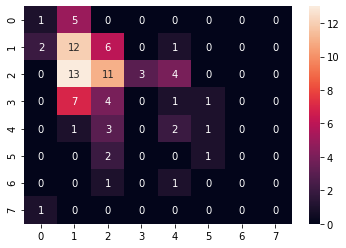


 SVM

Accuracy: 0.428571
Precision: 0.107741
Recall: 0.173963
F1 score: 0.330609

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


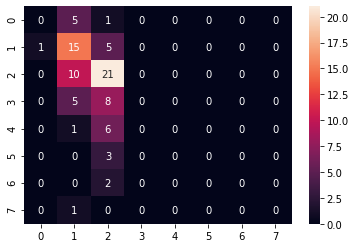


 RF

Accuracy: 0.607143
Precision: 0.380288
Recall: 0.397369
F1 score: 0.544370

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


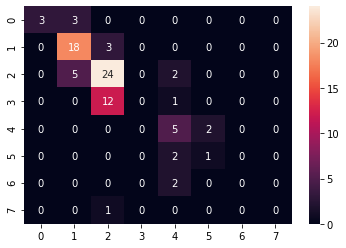


 DT

Accuracy: 0.511905
Precision: 0.310384
Recall: 0.326546
F1 score: 0.519253

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


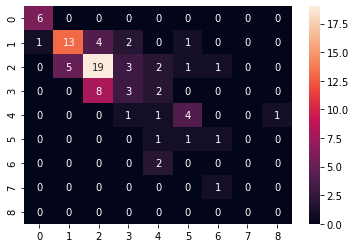


 NB

Accuracy: 0.511905
Precision: 0.320000
Recall: 0.327031
F1 score: 0.495957

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


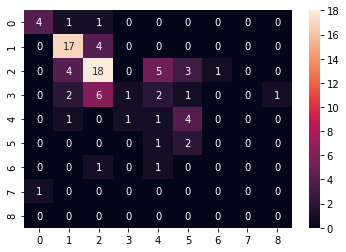



Fold : 2 


 KNN

Accuracy: 0.357143
Precision: 0.192619
Recall: 0.147119
F1 score: 0.316486

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


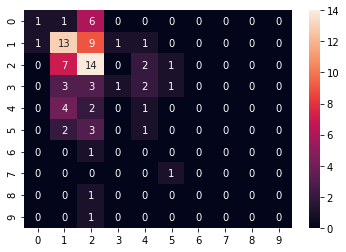


 SVM

Accuracy: 0.452381
Precision: 0.189918
Recall: 0.163333
F1 score: 0.350033

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


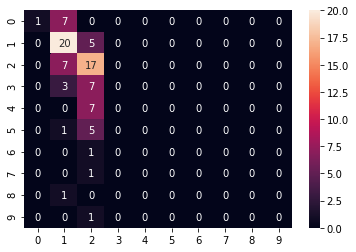


 RF

Accuracy: 0.702381
Precision: 0.395719
Recall: 0.338766
F1 score: 0.683615

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


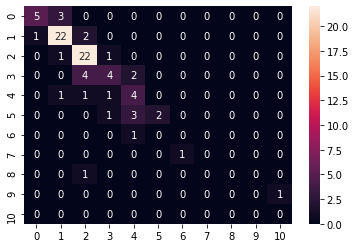


 DT

Accuracy: 0.619048
Precision: 0.424799
Recall: 0.397597
F1 score: 0.594855

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


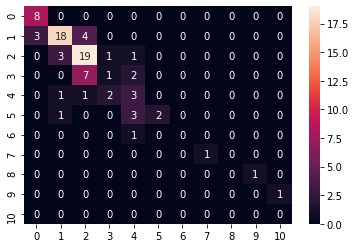


 NB

Accuracy: 0.583333
Precision: 0.345339
Recall: 0.313190
F1 score: 0.562151

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


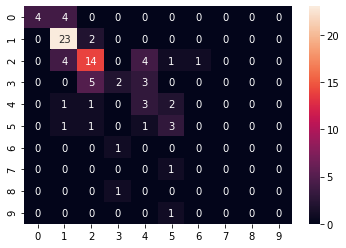



Fold : 3 


 KNN

Accuracy: 0.416667
Precision: 0.376105
Recall: 0.266514
F1 score: 0.411097

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


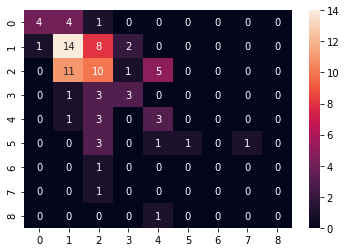


 SVM

Accuracy: 0.297619
Precision: 0.145414
Recall: 0.131193
F1 score: 0.256792

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


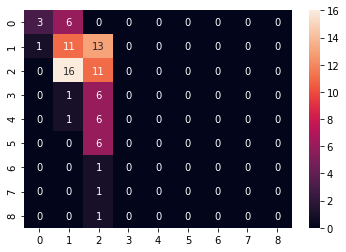


 RF

Accuracy: 0.678571
Precision: 0.455556
Recall: 0.371471
F1 score: 0.660746

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


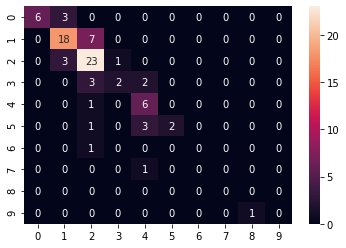


 DT

Accuracy: 0.690476
Precision: 0.434914
Recall: 0.421175
F1 score: 0.694867

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


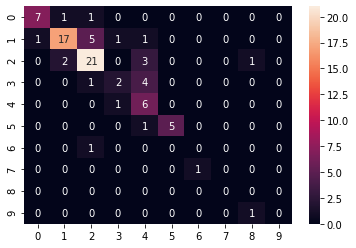


 NB

Accuracy: 0.428571
Precision: 0.333514
Recall: 0.282093
F1 score: 0.420337

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


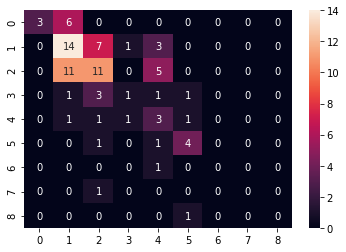



Fold : 4 


 KNN

Accuracy: 0.392857
Precision: 0.163550
Recall: 0.167482
F1 score: 0.357029

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


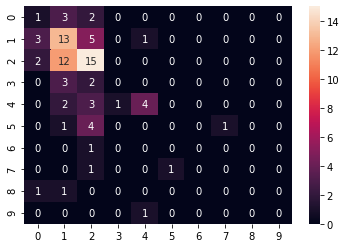


 SVM

Accuracy: 0.380952
Precision: 0.075515
Recall: 0.131191
F1 score: 0.280332

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


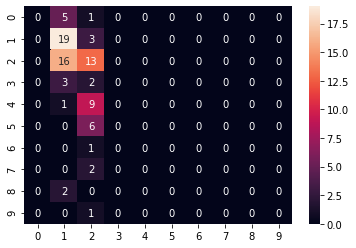


 RF

Accuracy: 0.654762
Precision: 0.421168
Recall: 0.386698
F1 score: 0.628310

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


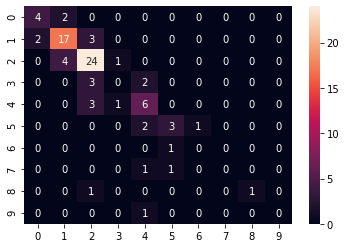


 DT

Accuracy: 0.666667
Precision: 0.553457
Recall: 0.506878
F1 score: 0.684285

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


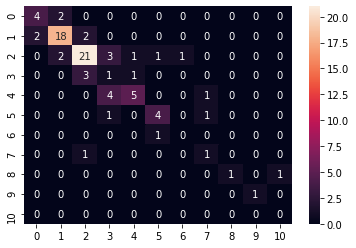


 NB

Accuracy: 0.547619
Precision: 0.443433
Recall: 0.408283
F1 score: 0.541778

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


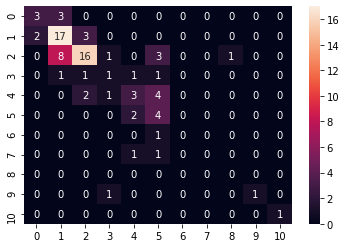



Fold : 5 


 KNN

Accuracy: 0.253012
Precision: 0.130736
Recall: 0.152230
F1 score: 0.229946

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


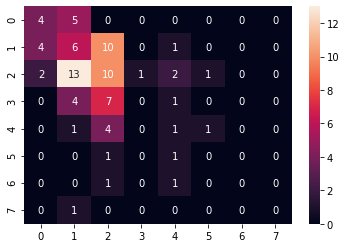


 SVM

Accuracy: 0.349398
Precision: 0.148352
Recall: 0.152641
F1 score: 0.279803

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


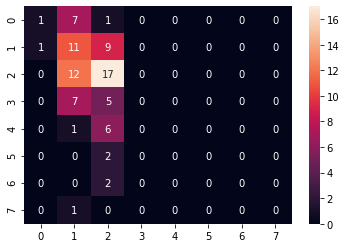


 RF

Accuracy: 0.602410
Precision: 0.398810
Recall: 0.349138
F1 score: 0.576919

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


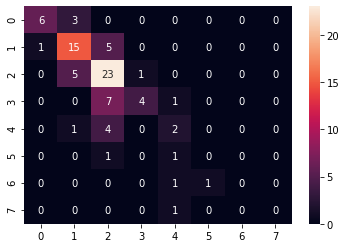


 DT

Accuracy: 0.614458
Precision: 0.343093
Recall: 0.333273
F1 score: 0.600665

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


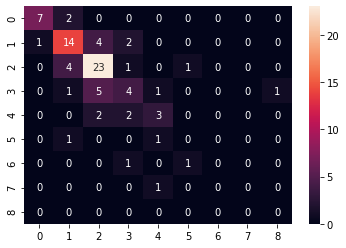


 NB

Accuracy: 0.337349
Precision: 0.251786
Recall: 0.256551
F1 score: 0.305750

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


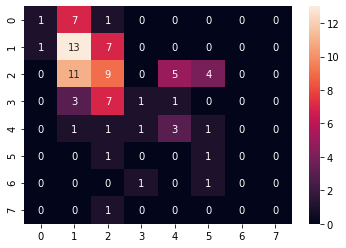



Fold : 6 


 KNN

Accuracy: 0.349398
Precision: 0.184073
Recall: 0.199487
F1 score: 0.315856

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


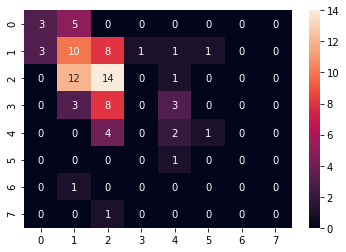


 SVM

Accuracy: 0.397590
Precision: 0.179981
Recall: 0.184606
F1 score: 0.324139

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


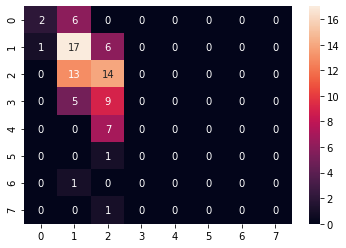


 RF

Accuracy: 0.638554
Precision: 0.551683
Recall: 0.520172
F1 score: 0.597314

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


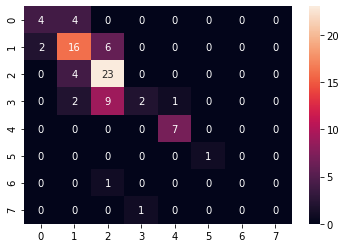


 DT

Accuracy: 0.638554
Precision: 0.568673
Recall: 0.637401
F1 score: 0.632769

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


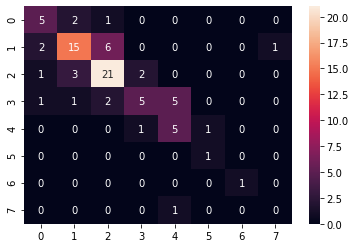


 NB

Accuracy: 0.397590
Precision: 0.219924
Recall: 0.314594
F1 score: 0.382337

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


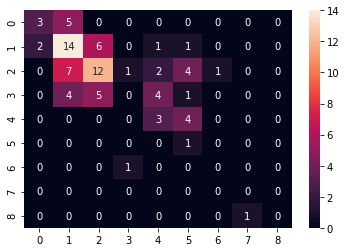



Fold : 7 


 KNN

Accuracy: 0.397590
Precision: 0.267637
Recall: 0.228355
F1 score: 0.376473

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


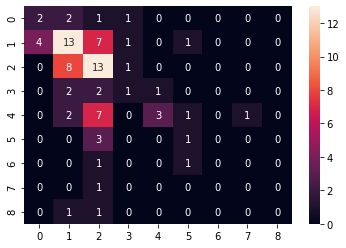


 SVM

Accuracy: 0.373494
Precision: 0.141780
Recall: 0.170293
F1 score: 0.302985

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


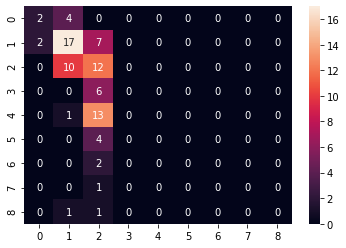


 RF

Accuracy: 0.686747
Precision: 0.456030
Recall: 0.468476
F1 score: 0.672111

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


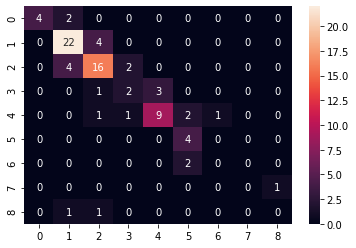


 DT

Accuracy: 0.638554
Precision: 0.410678
Recall: 0.434020
F1 score: 0.634367

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


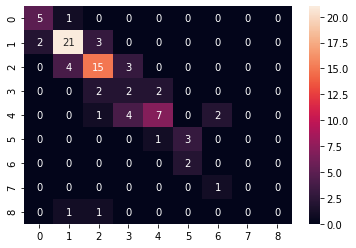


 NB

Accuracy: 0.469880
Precision: 0.295509
Recall: 0.301782
F1 score: 0.449325

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


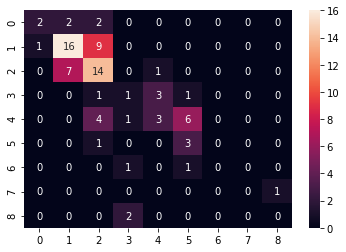



Fold : 8 


 KNN

Accuracy: 0.265060
Precision: 0.114762
Recall: 0.114763
F1 score: 0.230273

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


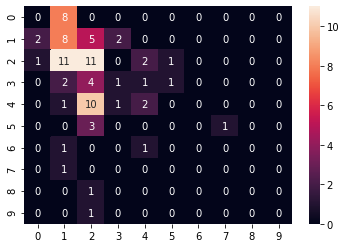


 SVM

Accuracy: 0.337349
Precision: 0.116769
Recall: 0.142817
F1 score: 0.243218

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


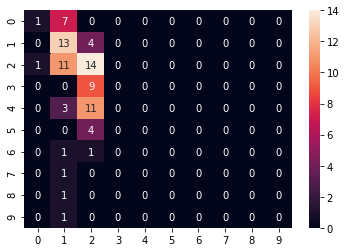


 RF

Accuracy: 0.650602
Precision: 0.434242
Recall: 0.438086
F1 score: 0.630610

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


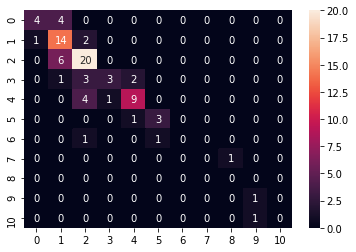


 DT

Accuracy: 0.602410
Precision: 0.445655
Recall: 0.435933
F1 score: 0.594289

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


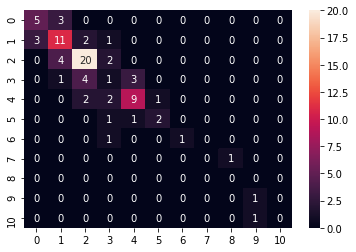


 NB

Accuracy: 0.433735
Precision: 0.268532
Recall: 0.361338
F1 score: 0.405651

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


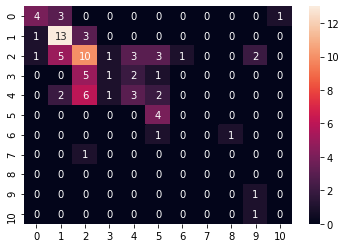



Fold : 9 


 KNN

Accuracy: 0.349398
Precision: 0.190596
Recall: 0.159951
F1 score: 0.315283

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


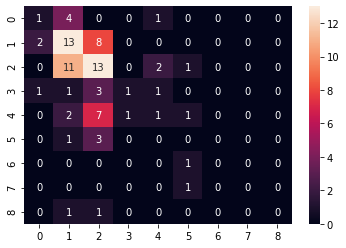


 SVM

Accuracy: 0.397590
Precision: 0.088760
Recall: 0.148685
F1 score: 0.297762

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


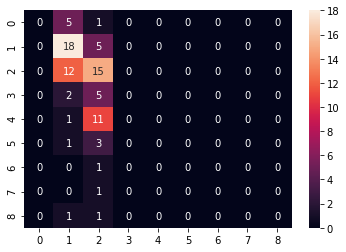


 RF

Accuracy: 0.722892
Precision: 0.430064
Recall: 0.396912
F1 score: 0.702425

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


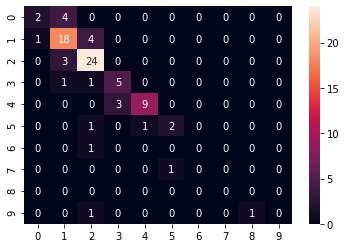


 DT

Accuracy: 0.626506
Precision: 0.318330
Recall: 0.340068
F1 score: 0.621368

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


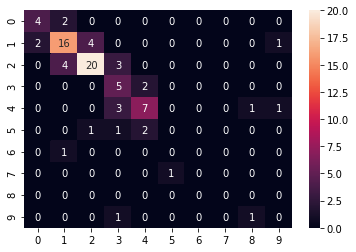


 NB

Accuracy: 0.493976
Precision: 0.218454
Recall: 0.261744
F1 score: 0.468767

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


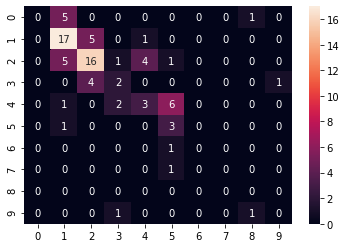



Fold : 10 


 KNN

Accuracy: 0.373494
Precision: 0.227273
Recall: 0.229833
F1 score: 0.354960

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


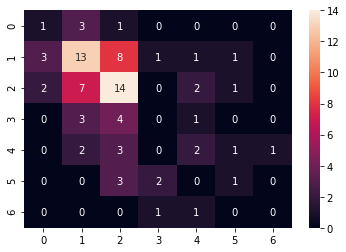


 SVM

Accuracy: 0.457831
Precision: 0.135065
Recall: 0.205128
F1 score: 0.360051

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


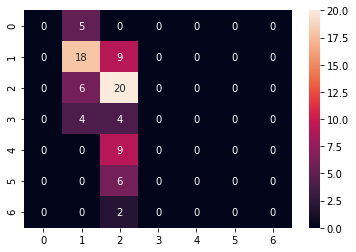


 RF

Accuracy: 0.710843
Precision: 0.695238
Recall: 0.585826
F1 score: 0.680900

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


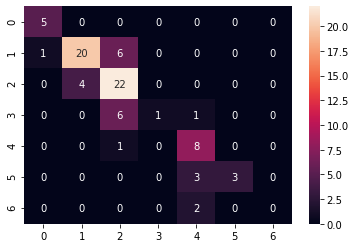


 DT

Accuracy: 0.638554
Precision: 0.451234
Recall: 0.456571
F1 score: 0.629162

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


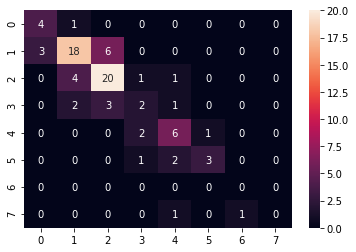


 NB

Accuracy: 0.518072
Precision: 0.427950
Recall: 0.462373
F1 score: 0.509691

 Confusion Matrix 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


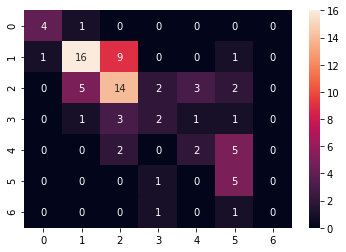

In [34]:
y = df["Fiyat Aralık"]                          
X = df.drop("Fiyat Aralık", axis = 'columns')   # sınıflar tahminleme yapılacak set içerisinden çıkarılır. Training set oluşturulur.
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold       
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA     

acc_knn = []
acc_rf = []
acc_svm = []
acc_dt = []
acc_nb = []

kf = KFold(n_splits=10)       #10 katlı çapraz geçerleme 
kf.get_n_splits(X)

i = 1
for train_index,test_index in kf.split(X):            #Dataset kesitlere bölünür ve sınıflandırma yapılır.
    print("\n")
    print(f"Fold : {i} \n")
    #print("Train:",train_index, "Test:", test_index)       
    i = i +1
    X_train = X.iloc[train_index]                     #belirlenen kesitlerin indislere göre train ve test setleri oluşturulur.                                         
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]  
                                                            
    KNN.fit(X_train, y_train)                        # .fit() fonksiyonu ile training set üzerinden eğitimler tamamlanır. 
    y_pred = KNN.predict(X_test)                     # .predict() fonksiyonu ile test set üzerinden tahminleme yapılır. 
    print("\n KNN")
    acc_knn.append(get_metrics(y_test, y_pred))                      # başarı ölçüm metrikleri hesaplanır.

    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    print("\n SVM")
    acc_svm.append(get_metrics(y_test, y_pred))

    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    print("\n RF")
    acc_rf.append(get_metrics(y_test, y_pred))

    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print("\n DT")
    acc_dt.append(get_metrics(y_test, y_pred))

    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    print("\n NB")
    acc_nb.append(get_metrics(y_test, y_pred))

In [35]:
acc_knn

[0.32142857142857145,
 0.35714285714285715,
 0.4166666666666667,
 0.39285714285714285,
 0.25301204819277107,
 0.3493975903614458,
 0.39759036144578314,
 0.26506024096385544,
 0.3493975903614458,
 0.37349397590361444]

In [ ]:
acc_

In [ ]:
sc = StandardScaler()                           # normalizasyon işlemleri yapılır.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components=1)                       #Linear discriminant analysis uygulanır ve sınıflandırma yapılır.          
X_train = lda.fit_transform(X_train, y_train) 
X_test = lda.transform(X_test)

KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print("\n KNN")
get_metrics(y_test, y_pred)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("\n SVM")
get_metrics(y_test, y_pred)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("\n RF")
get_metrics(y_test, y_pred)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print("\n DT")
get_metrics(y_test, y_pred)
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
print("\n NB")
get_metrics(y_test, y_pred)

In [36]:
print("KNN", acc_knn)
print("SVM",acc_svm)
print("RF", acc_rf)
print("DT", acc_dt)
print("NB", acc_nb)

KNN [0.32142857142857145, 0.35714285714285715, 0.4166666666666667, 0.39285714285714285, 0.25301204819277107, 0.3493975903614458, 0.39759036144578314, 0.26506024096385544, 0.3493975903614458, 0.37349397590361444]
SVM [0.42857142857142855, 0.4523809523809524, 0.2976190476190476, 0.38095238095238093, 0.3493975903614458, 0.39759036144578314, 0.37349397590361444, 0.3373493975903614, 0.39759036144578314, 0.4578313253012048]
RF [0.6071428571428571, 0.7023809523809523, 0.6785714285714286, 0.6547619047619048, 0.6024096385542169, 0.6385542168674698, 0.6867469879518072, 0.6506024096385542, 0.7228915662650602, 0.7108433734939759]
DT [0.5119047619047619, 0.6190476190476191, 0.6904761904761905, 0.6666666666666666, 0.6144578313253012, 0.6385542168674698, 0.6385542168674698, 0.6024096385542169, 0.6265060240963856, 0.6385542168674698]
NB [0.5119047619047619, 0.5833333333333334, 0.42857142857142855, 0.5476190476190477, 0.3373493975903614, 0.39759036144578314, 0.46987951807228917, 0.43373493975903615, 0.

Feature 0  Marka: 0.105723
Feature 1  Model: 0.404806
Feature 2  Model Yılı: 0.315326
Feature 3  Km: 0.235215
Feature 4  Şanzıman Türü: 0.262745
Feature 5  Yakıt Türü: 0.166219
Feature 6  Renk: 0.000000
Feature 7  Motor Gücü: 0.319695
Feature 8  Silindir Hacmi: 0.329577
Feature 9  Ağırlık: 0.417901
Feature 10  Kasa Cins Tipi: 0.094378
Feature 11  Araç Cinsi: 0.103633
Feature 12  Araç Tipi: 0.151562


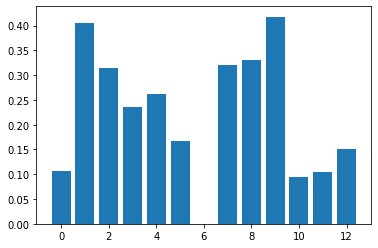

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

#Information Gain değerleri kullanılarak feature selection işlemleri gerçekleştirilir.

def select_features(X_train, y_train):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')     #mutual_info_classif fonksiyonu ile ingo gain değerleri hesaplanır.
	fs.fit(X_train, y_train)
	return fs                                                    # her özelliğin information gain sonuçları döndürülür
  
fs = select_features(X,y)
for i in range(len(fs.scores_)):
  print('Feature %d  %s: %f' % (i , X.columns.tolist()[i], fs.scores_[i]))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#Feature selection işlemleri sonucunda ayırt ediciliği düşük alanlar elenir ve yeniden sınfılandırma sonuçları incelenir.

y = df["Fiyat Aralık"]
deneme_X = df.drop(["Marka", "Yakıt Türü", "Renk", "Kasa Cins Tipi", "Araç Cinsi", "Araç Tipi", "Fiyat Aralık"], axis = 'columns')

kf = KFold(n_splits=10)
kf.get_n_splits(X)


acc_knn = []
acc_rf = []
acc_svm = []
acc_dt = []
acc_nb = []

i = 1
for train_index,test_index in kf.split(X):
    print("\n")
    print(f"Fold : {i} \n")
    i = i +1
    X_train = deneme_X.iloc[train_index]                           
    X_test = deneme_X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]  

    KNN.fit(X_train, y_train)                        # .fit() fonksiyonu ile training set üzerinden eğitimler tamamlanır. 
    y_pred = KNN.predict(X_test)                     # .predict() fonksiyonu ile test set üzerinden tahminleme yapılır. 
    print("\n KNN")
    acc_knn.append(get_metrics(y_test, y_pred))                      # başarı ölçüm metrikleri hesaplanır.

    SVM.fit(X_train, y_train)
    y_pred = SVM.predict(X_test)
    print("\n SVM")
    acc_svm.append(get_metrics(y_test, y_pred))

    RF.fit(X_train, y_train)
    y_pred = RF.predict(X_test)
    print("\n RF")
    acc_rf.append(get_metrics(y_test, y_pred))

    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    print("\n DT")
    acc_dt.append(get_metrics(y_test, y_pred))

    NB.fit(X_train, y_train)
    y_pred = NB.predict(X_test)
    print("\n NB")
    acc_nb.append(get_metrics(y_test, y_pred))

In [ ]:
import scipy.stats as stats
t_stat, p = stats.ttest_ind(acc_knn, acc_rf)

In [ ]:
t_stat

-12.712398846618703

In [ ]:
p

1.9833640801113538e-10